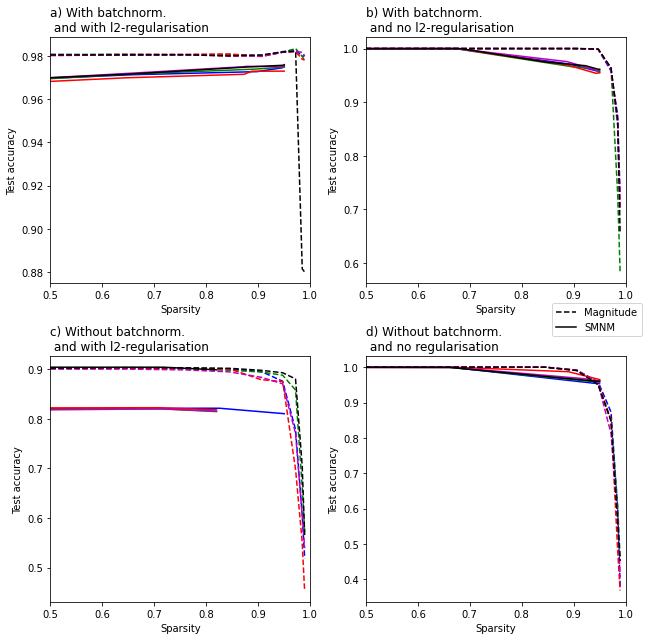

In [9]:
# Import data and create plots
import matplotlib.pyplot as plt
import pandas as pd
import pickle
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(9, 9))
plt.gray()



colors = ['b','g','r','m','k']
titles = ["a) With batchnorm.\n and with l2-regularisation",
          "b) With batchnorm.\n and no l2-regularisation",
          "c) Without batchnorm.\n and with l2-regularisation",
          "d) Without batchnorm.\n and no regularisation",
         ]
for j in [1,2,3,4,5]:
    
    with open('output/neural-network-pruning/pickle-jar/magnitude_histories'+str(j)+'.pickle', 'rb') as file:
        magnitude_histories = pickle.load(file)
            
    with open('output/neural-network-pruning/pickle-jar/adaptive_histories'+str(j)+'.pickle', 'rb') as file:
        iterative_histories = pickle.load(file)
            
    for i in range(len(magnitude_histories)):
        df_magnitude = pd.DataFrame(magnitude_histories[i])
        idx = df_magnitude.groupby(['sparsity'])['accuracy'].transform(max) == df_magnitude['accuracy']
        df_magnitude = df_magnitude[idx]
        
        
        df_iterative  = pd.DataFrame(iterative_histories[i])
        idx = df_iterative.groupby(['sparsity'])['accuracy'].transform(max) == df_iterative['accuracy']
        df_iterative = df_iterative[idx]
        
        
        ax[i//2, i%2].plot(df_magnitude["sparsity"],df_magnitude["accuracy"], '--', label = "Magnitude", color = colors[j-1])
        ax[i//2, i%2].plot(df_iterative["sparsity"],df_iterative["accuracy"], label = "SMNM", color = colors[j-1])
        ax[i//2, i%2].set_xlabel("Sparsity")
        ax[i//2, i%2].set_ylabel("Test accuracy")
        
        ax[i//2, i%2].set_title(titles[i], loc  = "left")
        ax[i//2, i%2].set_xlim((0.5,1))


        handles, labels = ax[1,1].get_legend_handles_labels()
        
handles = handles[(len(handles)-2):len(handles)]
labels = labels[(len(labels)-2):len(labels)]
fig.legend(handles, labels, loc='center right')
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

plt.savefig("output/figures/network_prune.png",  format='png')
plt.show()

In [4]:
## Export data for use in e.g. R
dfs_magnitude = []
dfs_iterative = []
for j in [1,2,3,4,5]:
    with open('output/neural-network-pruning/pickle-jar/magnitude_histories2'+str(j)+'.pickle', 'rb') as file:
            magnitude_histories = pickle.load(file)

    with open('output/neural-network-pruning/pickle-jar/adaptive_histories2'+str(j)+'.pickle', 'rb') as file:
        iterative_histories = pickle.load(file)

    for i in range(len(magnitude_histories)):
            df_magnitude = pd.DataFrame(magnitude_histories[i])
            idx = df_magnitude.groupby(['sparsity'])['accuracy'].transform(max) == df_magnitude['accuracy']
            df_magnitude = df_magnitude[idx]
            df_magnitude["j"] = j

            df_iterative  = pd.DataFrame(iterative_histories[i])
            idx = df_iterative.groupby(['sparsity'])['accuracy'].transform(max) == df_iterative['accuracy']
            df_iterative = df_iterative[idx]
            df_iterative["j"] = j
            
            if(j == 1):
                dfs_magnitude += [df_magnitude]
                dfs_iterative += [df_iterative]
            else:
                dfs_magnitude[i] = pd.concat([dfs_magnitude[i], df_magnitude]) 
                dfs_iterative[i] = pd.concat([dfs_iterative[i], df_iterative]) 
for i in range(len(dfs_magnitude)):
    dfs_magnitude[i]["i"]=i
    dfs_iterative[i]["i"]=i
dfm = pd.concat(dfs_magnitude) 
dfi = pd.concat(dfs_iterative) 
dfm.to_csv("output/neural-network-pruning/magnitude_data.csv")
dfi.to_csv("output/neural-network-pruning/adapt_data.csv")